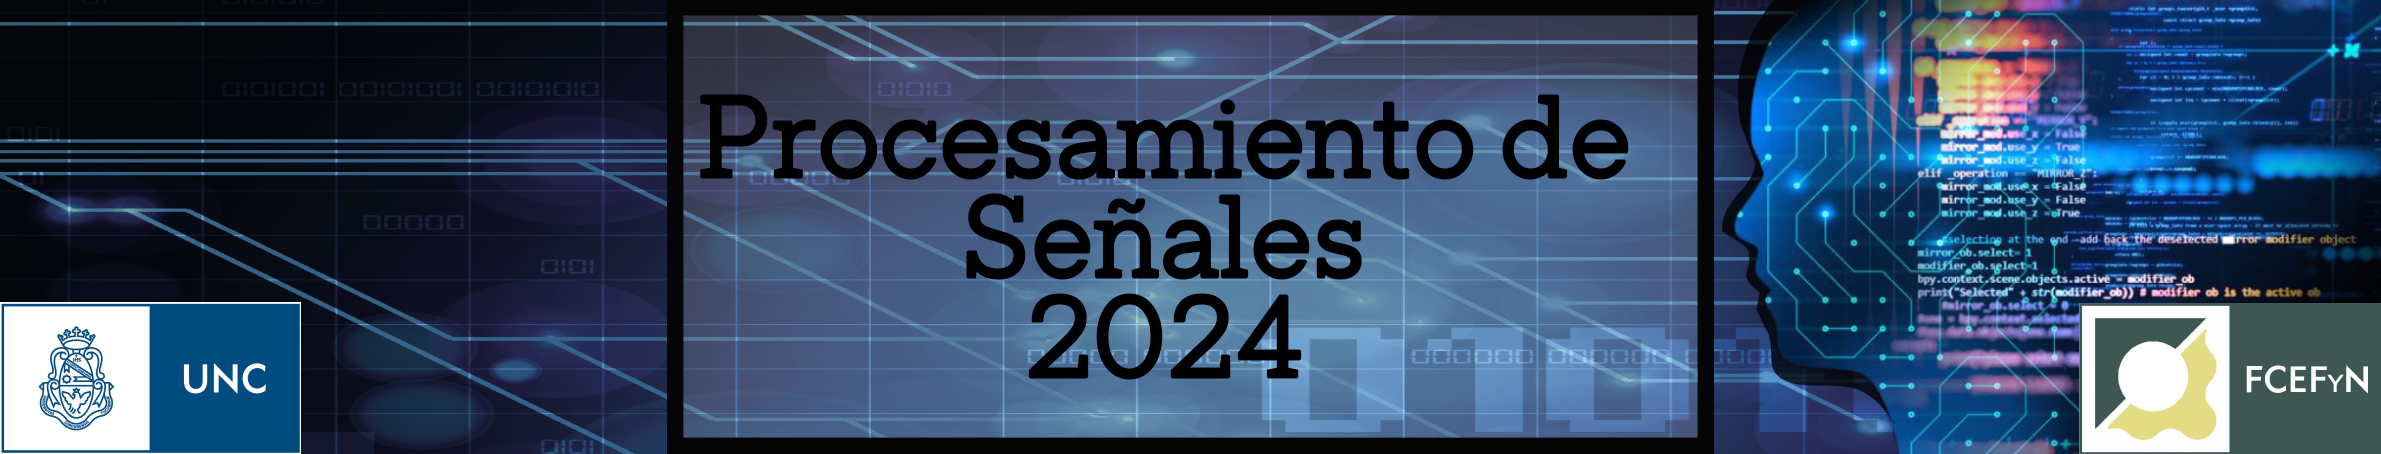

Laboratorio 4

**Señales no estacionarias**

**STFT, espectrograma**

## Transformada de Fourier a tiempo corto de una señal

**$STFT(x,h,t,w)=DFT(x.h_t)(w)$**


**para cada tiempo t** la  $STFT(x,h,t,w)$ de la señal $x$ es la Transf. de Fourier por la ventana centrada en $t$.

**Señal compleja que depende de la frecuencia w**

El Espectrograma de una señal es el módulo al cuadrado de la STFT (ver pág 121 apunte), también función de t y w:

**$Espectrograma_x(t,w)=|STFT(x,t,w)|^2=|DFT(x.h_t)(w)|^2$**

## Librerías necesarias

instalamos la librerías y sublibrerías necesarias para toda la notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal #para convolución lineal, análisis de señales, ventanas
from scipy.fftpack import fft,fftshift,ifft #funciones p/trabajar con la Transf. de Fourier
from scipy.io.wavfile import read, write  #para leer, grabar archivos de audio formato wav

### Repasemos: Frec en Hertz y Nyquist

Pasaremos la frecuencias fundamentales de la DFT a Hertz:
usaremos regla de 3 simple para que sea más simple.
Consideramos la DFT.N (descomposición en base $s_k$, con k=0,...,N-1)

k -------- N (muestras) , k oscilaciones en N muestras

fr ------- FrM (FrM muestras=1seg), fr= oscilaciones en 1 segundo  (es la frecuencia en Hertz

luego fr= k*FrM/N es la frecuencia en Hertz, p ara $k=0, \dots, N$ o centrada, siendo Fr/2 la Frec. de Nyquist (para k=N/2).  

o bien:

fr= k/(Pm*N)= k/L,

donde L=Pm*N, es el tiempo de N muestras y Pm=1/FrM el período de muestreo.

Dadas las señales:

$x_1(t)= 2\cos\left(18*2\pi t \right)  $

$x_2(t)= 5\cos\left(7*2\pi t \right)  $


* Sea la señal suma  
  
$s(t)=x_1(t)+x_2(t)$ con $ t \in [0,2)$

* Y la señal concatenada o adosada :


$c(t)=\left\{\begin{matrix}
 x_1(t) & \text{ si }  t \in [0,1) ;\\     
                   x_2(t)   & \text{ si }  t \in [1,2)
\end{matrix}\right.$

Discretizadas a 256 Hertz

La frecuencia de oscilación de cada señal y su amplitud de $x_1$ y $x_2$:

$x_1$ oscila $18$ veces en 1 segundo: Señal con frecuencia constante de 18/s= 18 Hrtz y su amplitud es 2.

$x_2$ oscila $7$ veces en 1 segundo: Señal con frecuencia constante de $7$ Hrtz y amplitud $5$.

Discretizamos las señales $s=x_1 + x_2$ y la señal concatenada para $t \in [0,2)$ a 256 Hertz.

In [ ]:
t=np.linspace(0,2,512,endpoint=False)
x1 = 2*np.cos(36*np.pi*t)
x2 = 5*np.cos(7*2*np.pi*t)

s = x1 + x2 #Como tienen la misma longitud podemos calcular la suma:
c = np.concatenate((x1[0:256],x2[256:512]))

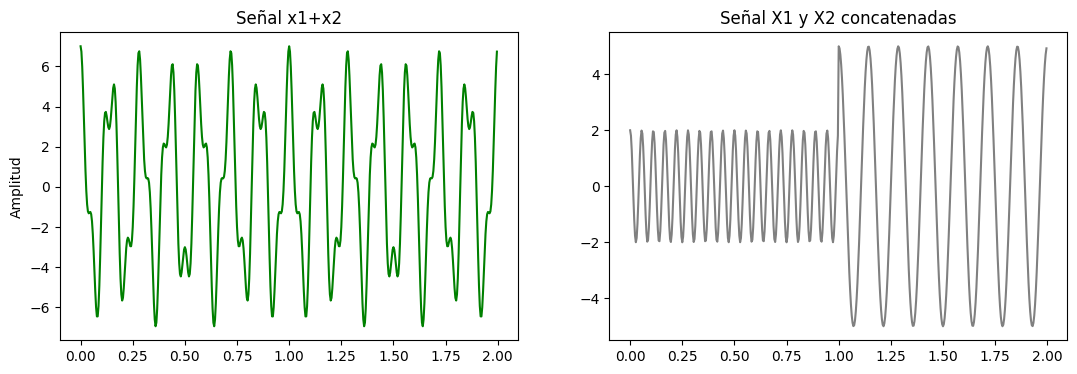

In [ ]:
plt.figure(figsize=(13, 4))
plt.subplot(121)
plt.plot(t, s, color='green')
plt.title('Señal x1+x2')
plt.ylabel('Amplitud')
plt.subplot(122)
plt.plot(t, c, color='gray')
plt.title('Señal X1 y X2 concatenadas')
plt.show()

**Calcule, grafique y analice el módulo la DFT.N con $N= 512$, de ambas señales compare. ¿Qué puede decir al respecto?**

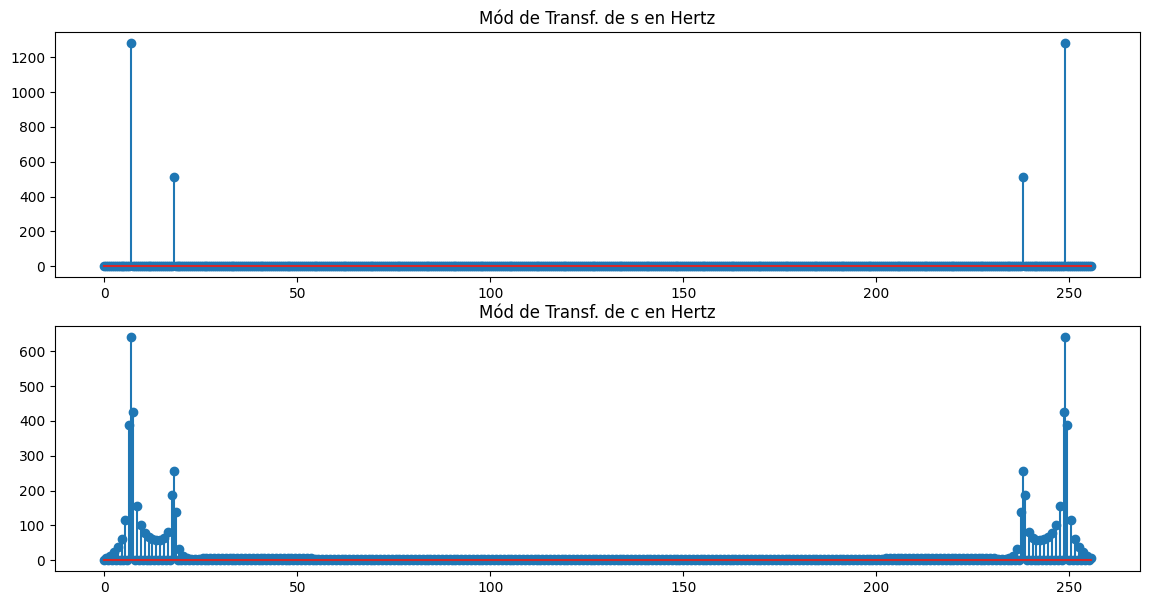

In [ ]:
N= 512 # cantidad de muestras es 2 segundo de muestreo.
FrM= 256 #frecuencia de muestreo
Pm= 1/FrM #período de muestreo
FNy=FrM//2 #frecuencia de Nyquist
t=np.arange(0,2,Pm) #vector de tiempo
T= N*Pm # =2 #tiempo total de muestreo para N muestras
fH=np.arange(N)/T #vector de Frecuencias en Hertz.
#print(fH)
fN=np.arange(0,N//2)/T
fcH=np.arange(-N//2,N//2)/T #Frecuencias centradas a Hertz
TFs=fft(s, N)
TFc=fft(c, N)
plt.figure(figsize=(14,7))
plt.subplot(211)
plt.stem(fH,abs(TFs))
plt.title('Mód de Transf. de s en Hertz')

plt.subplot(212)
plt.stem(fH,abs(TFc))
plt.title('Mód de Transf. de c en Hertz')
plt.show()


##Analizamos con el espectrograma##

In [ ]:
M=len(s)#Long de la señal

hr101=signal.windows.boxcar(101) #Ventana Rectangular
hb101=signal.windows.blackman(101) #Ventana Blackman, cantidad de muestras-longitud impar
f1, t1, Sxx1 = signal.spectrogram(s,fs=FrM, window=hr101,  nfft=None, noverlap=None) #espectograma
f2, t2, Sxx2 = signal.spectrogram(s,fs=FrM, window=hb101,  nfft=None, noverlap=None)

f1_c, t1_c, Sxx1_c = signal.spectrogram(c,fs=FrM, window=hr101,  nfft=None, noverlap=None) #espectograma
f2_c, t2_c, Sxx2_c= signal.spectrogram(c,fs=FrM, window=hb101,  nfft=None, noverlap=None)

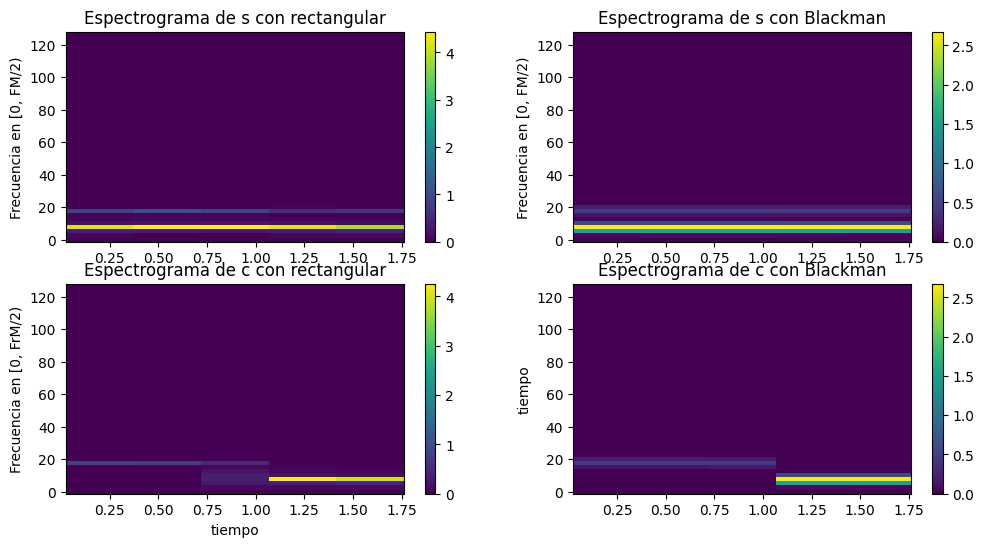

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.pcolormesh(t1, f1, Sxx1)
plt.title('Espectrograma de s con rectangular')
plt.ylabel('Frecuencia en [0, FM/2)')
plt.colorbar()

plt.subplot(222)
plt.pcolormesh(t2, f2, Sxx2)
plt.title('Espectrograma de s con Blackman')
plt.ylabel('Frecuencia en [0, FM/2)')
plt.colorbar()

plt.subplot(223)
plt.pcolormesh(t1_c, f1_c, Sxx1_c)
plt.title('Espectrograma de c con rectangular')
plt.ylabel('Frecuencia en [0, FrM/2)')
plt.xlabel('tiempo')
plt.colorbar()

plt.subplot(224)
plt.pcolormesh(t2_c, f2_c, Sxx2_c)
plt.title('Espectrograma de c con Blackman')
plt.ylabel('Frecuencia en [0, FrM/2)')
plt.ylabel('tiempo')
plt.colorbar()
plt.show()

¿Qué puede decir mirando la gráfica?

## Ej.
Realice el mismo análisis pero con mejor precisión en frecuencia.

##Hagamos lo mismo con la señal de audio del Lab. 3##

In [ ]:
path='audiolab1.wav'#nombre del archivo o ruta de acceso a donde esta el archivo
au1=read(path)
print (au1) #dupla

(44100, array([[  1,   1],
       [  1,   1],
       [  1,   1],
       ...,
       [  3,   3],
       [ -8,  -8],
       [-13, -13]], dtype=int16))


In [ ]:
Fr1=au1[0] # frecuencia de Muestreo
Pm= 1/Fr1 #período de muestreo
M=np.shape(au1[1])[0] #longitud de la señal
T=np.shape(au1[1])[0]/Fr1 # Tiempo total de muestreo

vector de datos: [  1   1   1 ...   3  -8 -13]
tamaño del vector de datos: (344053,)


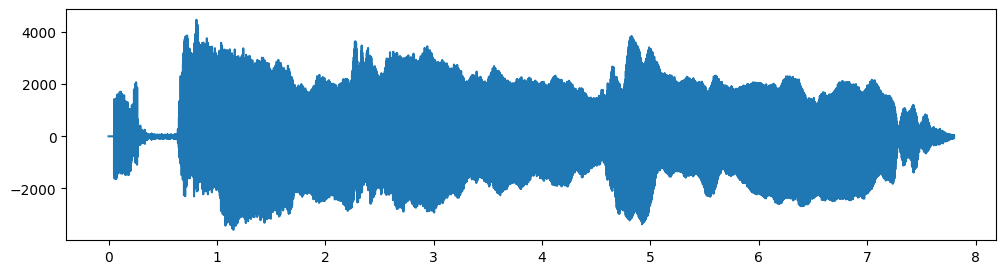

In [ ]:
A1=au1[1][:,0] #vector de datos, arreglo numpy, elegimos la primer columna un canal
print ('vector de datos:', A1)
print ('tamaño del vector de datos:', A1.shape)
t=np.arange(0,T,Pm)

plt.figure(figsize=(12,3))
plt.plot(t,A1)
plt.show()

##Analizamos con el espectrograma##

In [ ]:
print(M) #Long de la señal

hr=signal.windows.boxcar(10001) #Ventana Rectangular
hb=signal.windows.blackman(10001) #Ventana Blackman, cantidad de muestras-longitud impar
f1, t1, Sxx1 = signal.spectrogram(A1,fs=Fr1, window=hr,  nfft=None, noverlap=None) #espectograma
f2, t2, Sxx2 = signal.spectrogram(A1,fs=Fr1, window=hb,  nfft=None, noverlap=None)

f1_sol, t1_sol, Sxx1_sol = signal.spectrogram(A1,fs=Fr1, window=hr,  nfft=None, noverlap=3000) #espectograma
f2_sol, t2_sol, Sxx2_sol= signal.spectrogram(A1,fs=Fr1, window=hb,  nfft=None, noverlap=3000)

344053


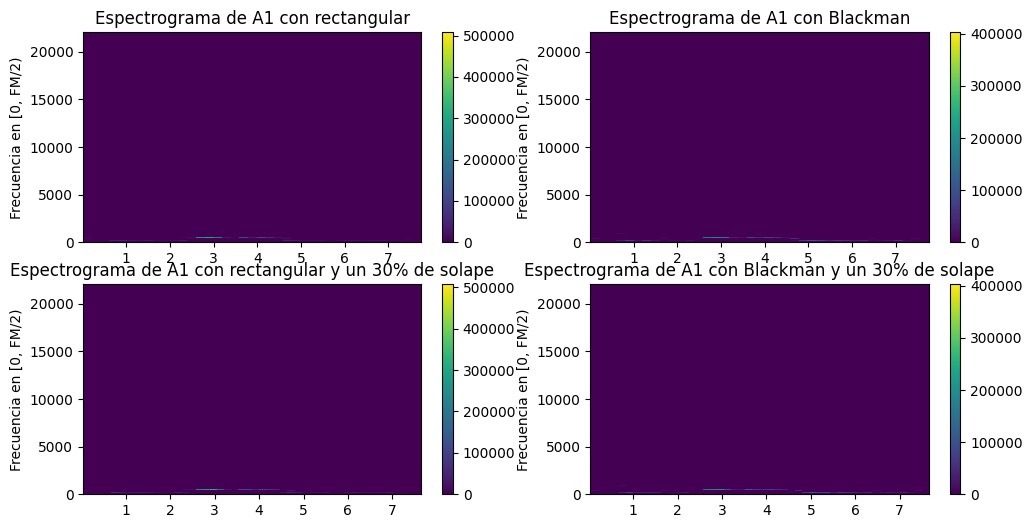

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.pcolormesh(t1, f1, Sxx1)
plt.title('Espectrograma de A1 con rectangular')
plt.ylabel('Frecuencia en [0, FM/2)')
plt.colorbar()

plt.subplot(222)
plt.pcolormesh(t2, f2, Sxx2)
plt.title('Espectrograma de A1 con Blackman')
plt.ylabel('Frecuencia en [0, FM/2)')
plt.colorbar()

plt.subplot(224)
plt.pcolormesh(t2_sol, f2_sol, Sxx2_sol)
plt.title('Espectrograma de A1 con Blackman y un 30% de solape')
plt.ylabel('Frecuencia en [0, FM/2)')
plt.colorbar()

plt.subplot(223)
plt.pcolormesh(t1_sol, f1_sol, Sxx1_sol )
plt.title('Espectrograma de A1 con rectangular y un 30% de solape')
plt.ylabel('Frecuencia en [0, FM/2)')
plt.colorbar()
plt.show()

### hacemos zoom
recordar que el espectrograma depende de dos índices, es una matriz o arreglo bidimensional

In [ ]:
print(t2.shape, f2.shape, Sxx2.shape)
print(t2_sol.shape, f2_sol.shape, Sxx2_sol.shape)

(39,) (5001,) (5001, 39)
(48,) (5001,) (5001, 48)


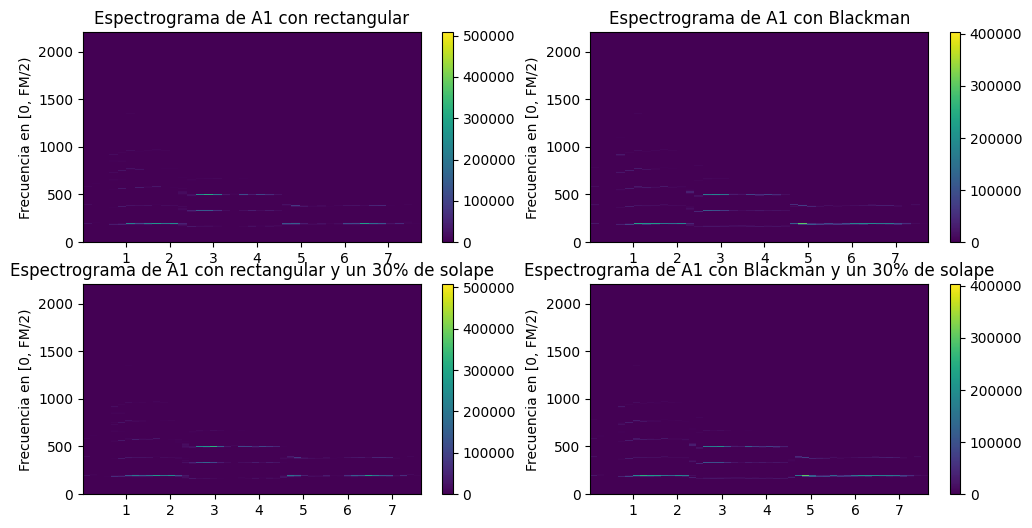

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.pcolormesh(t1, f1[0:500], Sxx1[0:500,:])
plt.title('Espectrograma de A1 con rectangular')
plt.ylabel('Frecuencia en [0, FM/2)')
plt.colorbar()

plt.subplot(222)
plt.pcolormesh(t2, f2[0:500], Sxx2[0:500])
plt.title('Espectrograma de A1 con Blackman')
plt.ylabel('Frecuencia en [0, FM/2)')
plt.colorbar()

plt.subplot(224)
plt.pcolormesh(t2_sol, f2_sol[0:500], Sxx2_sol[0:500, :])
plt.title('Espectrograma de A1 con Blackman y un 30% de solape')
plt.ylabel('Frecuencia en [0, FM/2)')
plt.colorbar()

plt.subplot(223)
plt.pcolormesh(t1_sol, f1_sol[0:500], Sxx1_sol[0:500, :] )
plt.title('Espectrograma de A1 con rectangular y un 30% de solape')
plt.ylabel('Frecuencia en [0, FM/2)')
plt.colorbar()
plt.show()

# Ejercicio: Chirp Lineal

a) Genere la señal NO estacionaria Chirp Lineal: Señal oscilante con frecuencia de oscilación creciente de manera lineal

tiempo en [0,2) muestreado con 2000 muestras:


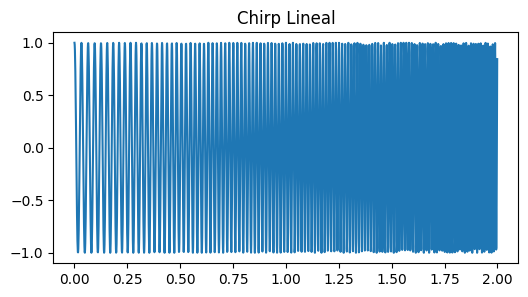

In [ ]:
t = np.arange(0,2, 0.001) #tiempo con 1000 Hz frec de muestreo (Período 0.001s)
print('tiempo en [0,2) muestreado con', len(t),'muestras:')
C1=signal.chirp(t,30,1,60) #frec inicial 30Hz y 60Hz al segundo

plt.figure(figsize=(6, 3))
plt.plot(t,C1)
plt.title('Chirp Lineal')
plt.show()

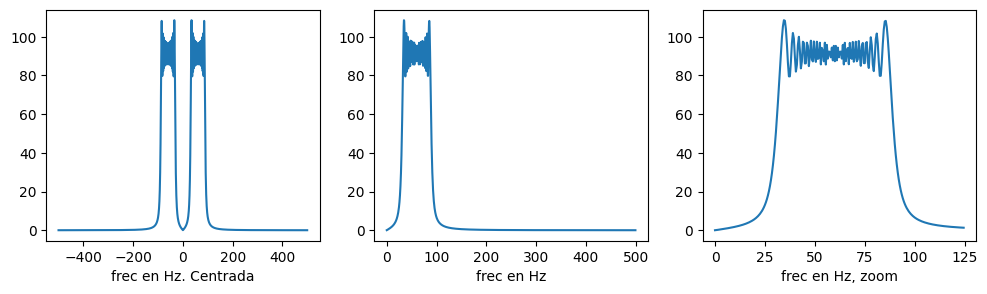

In [ ]:
N=2000 # número total de muestras.
TFC1=fft(C1,N)
#T= ?? #tiempo de muestreo ????
kc=np.arange(-N/2,N/2)
FrM=1000 # frec de muestreo 1000 Hz
fr_Hz_centrada=kc*FrM/N #en Hz [-Fr1/2,Fr1/2), N muestras, Fr1/2=frec de Nyquist

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.plot(fr_Hz_centrada,fftshift(abs(TFC1)))
plt.xlabel('frec en Hz. Centrada')

fr_Hz=np.arange(0,N/2)*FrM/N #en Hz [0,Fr1/2), N/2 muestras
plt.subplot(132)
plt.plot(fr_Hz,abs(TFC1[0:N//2]))
plt.xlabel('frec en Hz')

fr_Hz=np.arange(0,N/2)*FrM/N #en Hz [0,Fr1/2), N/2 muestras
plt.subplot(133)
plt.plot(fr_Hz[0:250],abs(TFC1[0:250]))
plt.xlabel('frec en Hz, zoom')
plt.show()

###b) STFT, Espectrograma

Analice la señal del item anterior con la STFT mirando su Espectrograma utilizando la DFT punto N (cantidad de muestras de la señal), la ventana Hamming y la rectangular con dos resoluciones distintas para tiempo-frecuencia cada una (cuatro análisis en total).

In [ ]:
h33=signal.windows.hamming(33)
h501=signal.windows.hamming(501)

f1, t1, Sxx1 = signal.spectrogram(C1,fs=FrM, window=h33,nfft=N, noverlap=None) #espectograma sin solape
f2, t2, Sxx2 = signal.spectrogram(C1,fs=FrM, window=h501, nfft=N, noverlap=None) # espectrograma sin solape

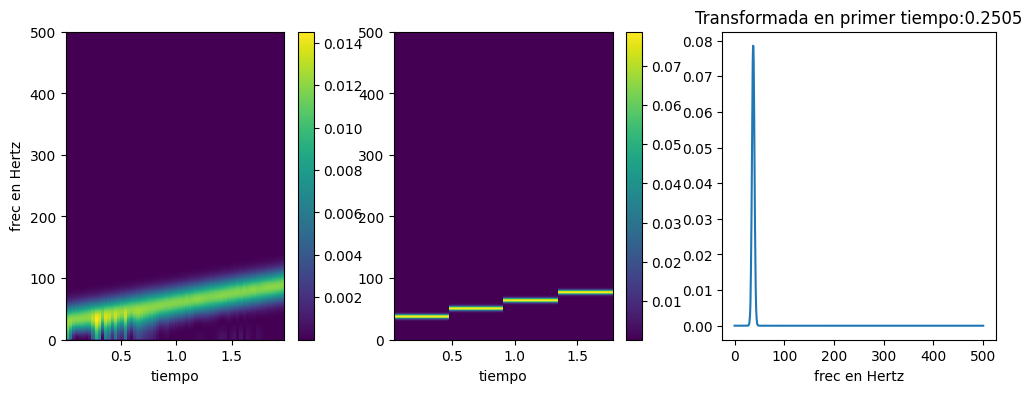

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.pcolormesh(t1, f1, Sxx1)
plt.xlabel('tiempo')
plt.ylabel('frec en Hertz')
plt.colorbar()# la altura de z se representa con un color->mapa de color/calor
plt.subplot(132)
plt.pcolormesh(t2, f2, Sxx2)
plt.xlabel('tiempo')
plt.colorbar()

plt.subplot(133)
plt.plot(f2, Sxx2[:,0]) #col 0, Transformada en el primer tiempo
plt.xlabel('frec en Hertz')
plt.title('Transformada en primer tiempo:'+str(t2[0]))

plt.show()

¿Qué puede decir a partir de la gráfica del espectrograma?

**Ejercicio:**

Realice lo mismo con dos ventanas rectangulares de distintas resolución para tiempo-frecuencia, donde una de ellas sea sin solape y la otra con un solape del $30$ por ciento.

##Ejercicio: Chirp Cuadrático##

a) Genere la señal NO estacionaria Chirp Cuadrático: Señal oscilante con frecuencia de oscilación creciente de manera cuadrática.

(b) Analice la señal del item anterior con la STFT mirando su espectrograma utilizando la DFT punto N (Cantidad de muestras de la señal), la ventana Hamming y la rectangular con dos resoluciones distintas para tiempo-frecuencia cada una.

tiempo en [0,2) muestreado con 2000 muestras:


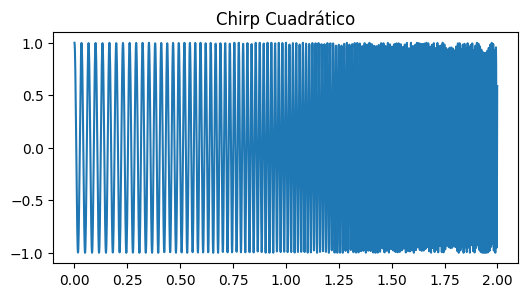

In [ ]:
# (a) Chirp Cuadrático
t = np.arange(0,2, 0.001) #tiempo en [0,2) con 1000 Hz frec de muestreo (Período 0.001s)
print('tiempo en [0,2) muestreado con', len(t),'muestras:')

C2=signal.chirp(t,30,1,60,'q') #frec inicial 30Hz y 60Hz al segundo
plt.figure(figsize=(6, 3))
plt.plot(t,C2)
plt.title('Chirp Cuadrático')
plt.show()

**Ejercicio: Audio**

a) Considere la señal NO estacionaria de audio: 'audio2.wav', extraiga la Frecuencia de muestreo, la cantidad de muestras y la duración de la señal. Grafique la señal en función del tiempo.

**CUIDADO** que puede ser que tenga un solo canal...

b) Analice la señal del item anterior con la STFT mirando su Espectrograma utilizando la DFT punto N=Cantidad de muestras de la señal, la ventana Hamming y la rectangular con dos resoluciones distintas para tiempo-frecuencia cada una.

## Aplicaciones
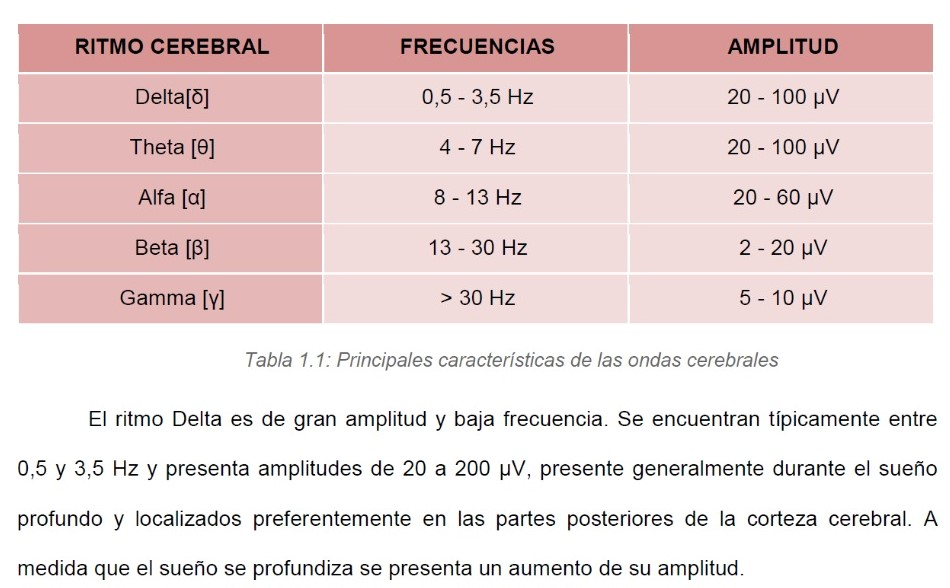

Gentileza de Maiztegui y Rochetti que rindieron su PI en 2022 en esta área, análisis de coinciencia - sueño

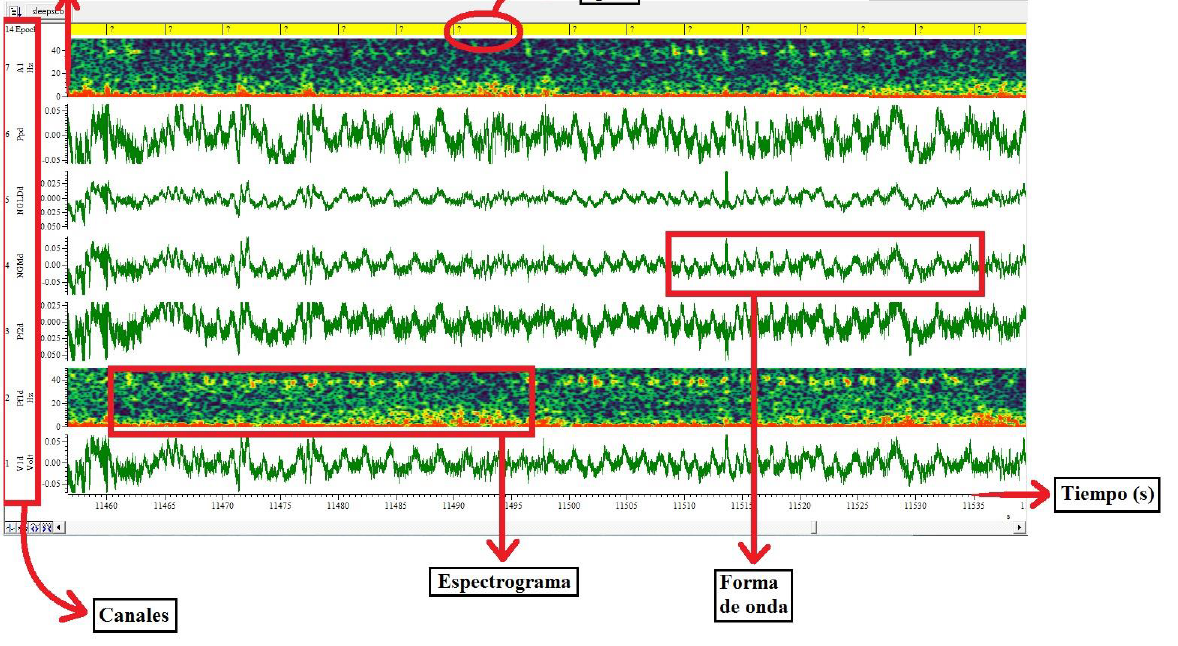

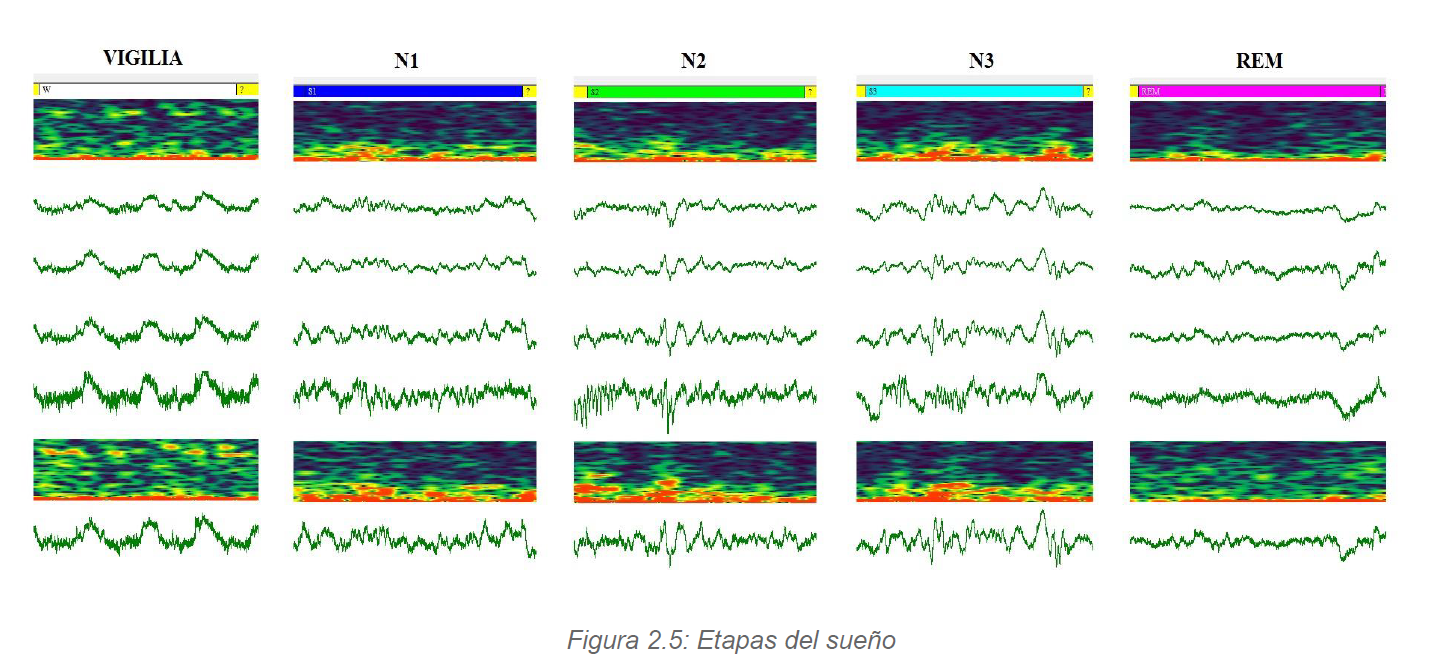